In [1]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza survival.tsv
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement_Ziza growth traits.tsv

survival = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement-Ziza survival.tsv', sep='\t', header=23)
growth_traits = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Clement Ziza 2014/Clement_Ziza growth traits.tsv', sep='\t', header=19)
#/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Ben folder/QTL mapping/washing_phenotypes.csv
wash_data = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Ben folder/QTL mapping/washing_phenotypes.csv', sep=',', header=0)
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Ben folder/QTL mapping/filtering_phenotypes.csv
filt_data = pd.read_csv('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/Ben folder/QTL mapping/filtering_phenotypes.csv', sep=',', header=0)
#drop first column in wash_data and filt_data
wash_data = wash_data.drop(wash_data.columns[0], axis=1)
filt_data = filt_data.drop(filt_data.columns[0], axis=1)


In [6]:
#survival retain columns strain, Dead Viable
survival = survival[['strain', 'Viable']]
#groupby strain, mean of all other columns
growth_traits = growth_traits.groupby('strain').mean()
#merge survival and growth traits
traits= survival.merge(growth_traits, on='strain')
#in the row where strain is 978, rename it to X968
#merge traits with wash data and filt_data on strain which is Strain for filt_data. Remove column Strain after.
traits = traits.replace('978', 'X968')
traits = pd.merge(traits, wash_data, left_on='strain', right_on='strain')
traits = pd.merge(traits, filt_data, left_on='strain', right_on='Strain')
traits = traits.drop('Strain', axis=1)
#look for correlation between Viable,efficiency, muMax, lag_time, area,ratio vs %flocc. Report p-value and use st.stats
res_df = pd.DataFrame(columns=['trait', 'p-value'])
for col in traits.columns[1:]:
    res = st.pearsonr(traits['%flocc'], traits[col])
    res_df = res_df.append({'trait':col, 'p-value':res[1],"coef":res[0]}, ignore_index=True)
res_df



,trait,p-value,coef
0,Viable,1.773829e-01,0.182849
1,efficiency,4.249638e-01,-0.108752
2,muMax,5.374996e-01,0.084148
3,lag_time,7.901776e-01,0.036365
4,area,8.889434e-01,-0.019089
5,ratio,4.808393e-18,0.867920
6,%flocc,0.000000e+00,1.000000


In [7]:
#same for ratio
res_df = pd.DataFrame(columns=['trait', 'p-value'])
for col in traits.columns[1:]:
    res = st.pearsonr(traits['ratio'], traits[col])
    res_df = res_df.append({'trait':col, 'p-value':res[1],"coef":res[0]}, ignore_index=True)
res_df

,trait,p-value,coef
0,Viable,4.105483e-02,0.273936
1,efficiency,3.899990e-01,-0.117117
2,muMax,4.699017e-01,-0.098554
3,lag_time,9.095634e-01,-0.015528
4,area,8.356888e-01,-0.028350
5,ratio,0.000000e+00,1.000000
6,%flocc,4.808393e-18,0.867920


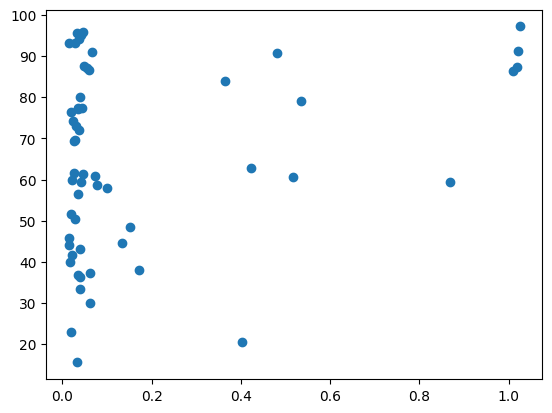

In [5]:
#make a scatter plot of viable and ratio
plt.scatter(traits['ratio'], traits['Viable'])